# 🚦 Project Introduction: Traffic Accident Clustering and Severity Analysis 


This project explores traffic accident data collected in Kenya by World Bank, focusing on clustering and segmenting crash incidents based on textual keywords, spatial-temporal patterns, and severity indicators. The goal is to uncover high-risk patterns, identify vulnerable road users (such as pedestrians and motorcyclists), and guide targeted safety interventions.

To enhance geographic insights, county names have been integrated using the coordinates (latitude, longitude), which enables regional analysis of crash patterns.

📊 Dataset Overview

The dataset represents individual crash incidents, enriched with keyword-derived features (e.g., mentions of fatalities or types of vehicles), timestamps, and spatial attributes. Each row represents a unique crash event.

📘 Column Descriptions

crash_id: Unique identifier for each crash incident.

crash_datetime: Full timestamp when the crash occurred (e.g., "2015-09-21 17:00:00").

crash_date: Date portion of the crash timestamp. Useful for date-level aggregations.

latitude: Geographic coordinate specifying the north-south position of the crash location.

longitude: Geographic coordinate specifying the east-west position of the crash location.

n_crash_reports: Number of times this crash has been reported (may reflect severity or public attention).

contains_fatality_words: Binary flag (0/1) indicating whether the crash report mentions a fatality-related term.

contains_pedestrian_words: Binary flag (0/1) indicating whether pedestrians are mentioned in the crash report.

contains_matatu_words: Binary flag (0/1) showing if the report mentions a matatu (a common form of public transport in Kenya).

contains_motorcycle_words: Binary flag (0/1) indicating if motorcycles are involved in the crash.

month: Month when the crash occurred (1–12). Useful for seasonal analysis.

year: Year of the incident. Allows tracking trends over time.

day: Day of the month when the crash happened.

time: Hour of the day (0–23) when the crash occurred. Used for temporal pattern analysis.

county_name (integrated): Name of the county where the crash occurred, derived from geolocation data. Useful for mapping and policy recommendations.


<span style="color:blue">DATASET FROM WORLDBANK ANALYZED BY MIKE MURANGO (mikemurango00@gmail.com)</span>


In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import sys

sys.path.append(r"C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\accidents_scripts")

from visualiseplots import plot_crashes, save_figures
from processor import preprocess_dataframe
from file_importer import save_file_to_interim, save_file_to_raw, save_file_to_processed



In [16]:
df = pd.read_csv(r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\data\processed\final_dataset.csv')
df.head()

,Unnamed: 0,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,county_name,County_Code_x,County_Code_y,month,year,day,time
0,0,1,0,0,0,0,Nairobi,47,47,6,2018,6,20:39:54
1,1,1,0,0,0,0,Kiambu,22,22,5,2018,25,17:51:54
2,2,1,0,0,0,0,Machakos,16,16,5,2018,25,18:11:54
3,3,1,1,0,0,0,Nairobi,47,47,5,2018,25,21:59:54
4,4,1,0,0,0,0,Nairobi,47,47,5,2018,26,07:11:54


In [17]:
df = df.drop('Unnamed: 0', axis=1)

In [18]:
df.head()

,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,county_name,County_Code_x,County_Code_y,month,year,day,time
0,1,0,0,0,0,Nairobi,47,47,6,2018,6,20:39:54
1,1,0,0,0,0,Kiambu,22,22,5,2018,25,17:51:54
2,1,0,0,0,0,Machakos,16,16,5,2018,25,18:11:54
3,1,1,0,0,0,Nairobi,47,47,5,2018,25,21:59:54
4,1,0,0,0,0,Nairobi,47,47,5,2018,26,07:11:54


C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\accidents_scripts\visualizer.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


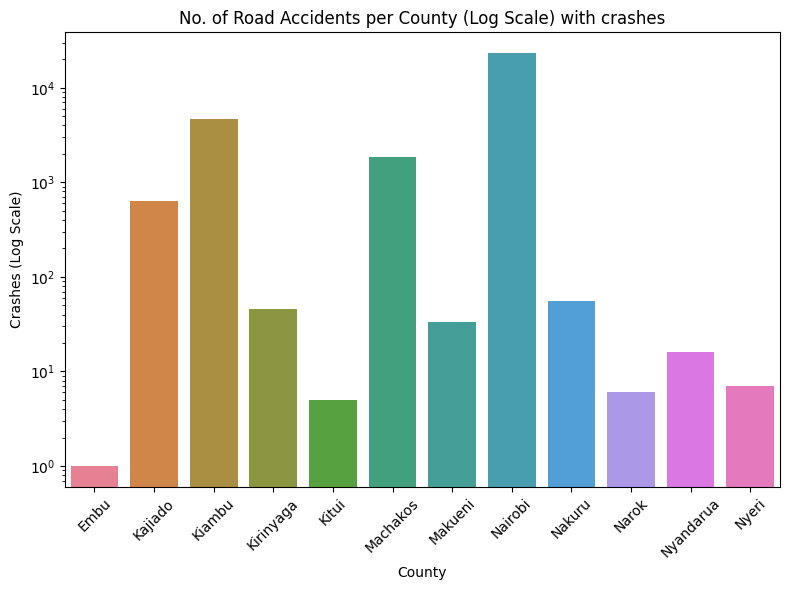

In [11]:
crashes_per_county = df.groupby('county_name')['n_crash_reports'].size().reset_index(name='crashes')
column1 = 'county_name'
column2 = 'crashes'

# Call the function and store the returned figure
fig_crashes = plot_crashes(crashes_per_county, column1, column2)

# Define full file path including filename
save_path = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\crashes_per_county.png'

# Save the figure
save_figures(fig_crashes, save_path)
fig_crashes

C:\Users\nexwa\AppData\Local\Temp\ipykernel_23280\3432974002.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


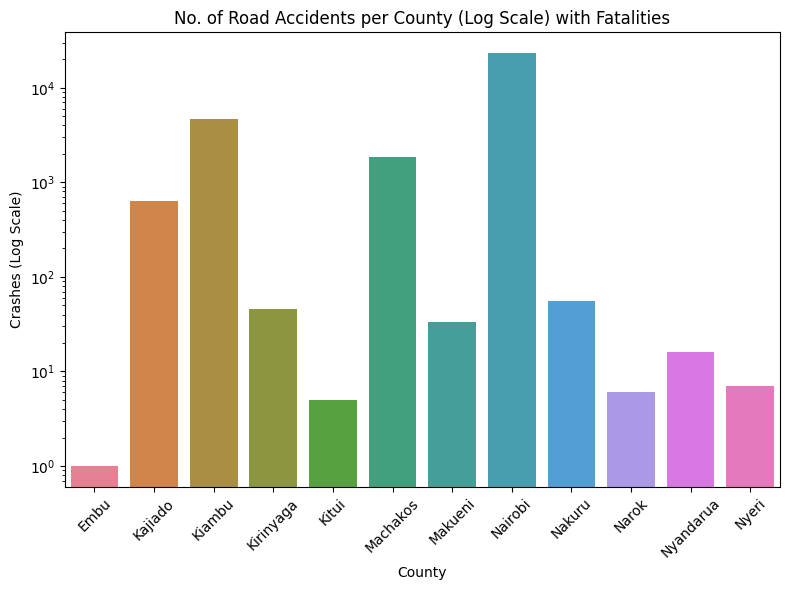

In [44]:
fatalities_per_county = df.groupby('county_name')['contains_fatality_words'].size().reset_index(name='Fatalities')
column1 = 'county_name'
column2 = 'Fatalities'
save_path = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\fatalities_per_county.png'
fatality_crashes = plot_crashes(fatalities_per_county, column1, column2)
save_figures(fatality_crashes, save_path)
fatality_crashes

C:\Users\nexwa\AppData\Local\Temp\ipykernel_23280\3432974002.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


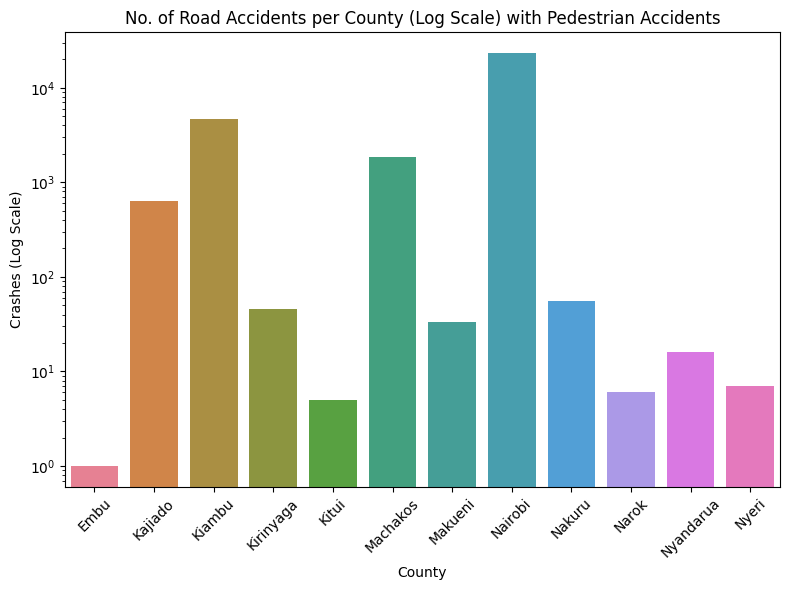

In [45]:
Pedestrian_Accidents_per_county = df.groupby('county_name')['contains_pedestrian_words'].size().reset_index(name='Pedestrian Accidents')
column1 = 'county_name'
column2 = 'Pedestrian Accidents'
save_path = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\Pedestrian Accidents_per_county.png'
Pedestrian_Accidents = plot_crashes(Pedestrian_Accidents_per_county, column1, column2)
save_figures(Pedestrian_Accidents, save_path)
Pedestrian_Accidents

C:\Users\nexwa\AppData\Local\Temp\ipykernel_23280\3432974002.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


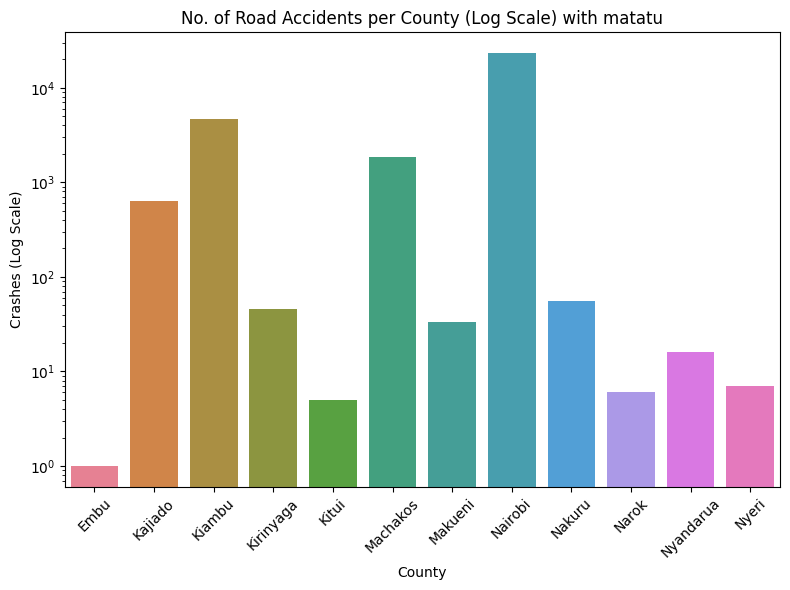

In [51]:
matatu_Accidents_per_county = df.groupby('county_name')['contains_matatu_words'].size().reset_index(name='matatu')
column1 = 'county_name'
column2 = 'matatu'
save_path = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\matatu accidents_per_county.png'
matatu_Accidents = plot_crashes(matatu_Accidents_per_county, column1, column2)
save_figures(matatu_Accidents, save_path)
matatu_Accidents

C:\Users\nexwa\AppData\Local\Temp\ipykernel_23280\3432974002.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


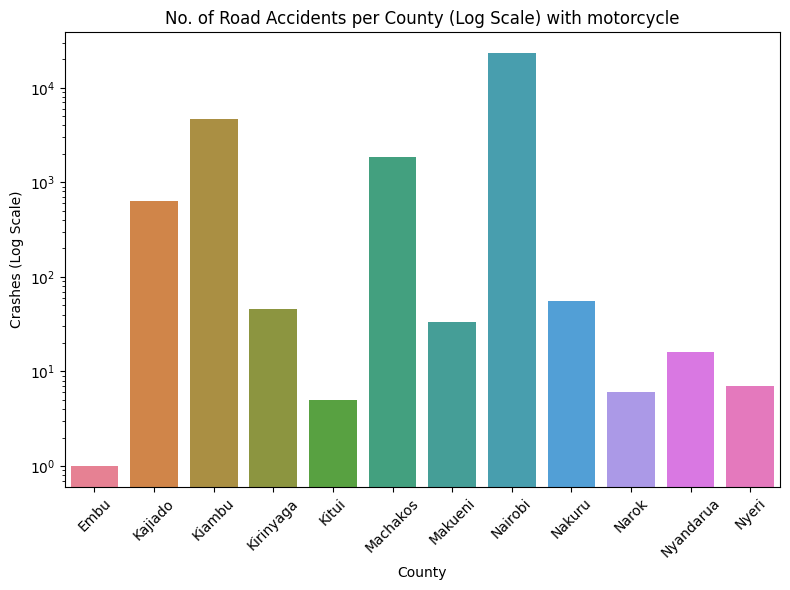

In [53]:
motorcycle_Accidents_per_county = df.groupby('county_name')['contains_motorcycle_words'].size().reset_index(name='motorcycle')
column1 = 'county_name'
column2 = 'motorcycle'
save_path = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\motorcycle accidents_per_county.png'
motorcycle_Accidents = plot_crashes(motorcycle_Accidents_per_county, column1, column2)
save_figures(motorcycle_Accidents, save_path)
motorcycle_Accidents

In [20]:
# Convert to datetime and extract hour
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Categorize based on hour
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time)

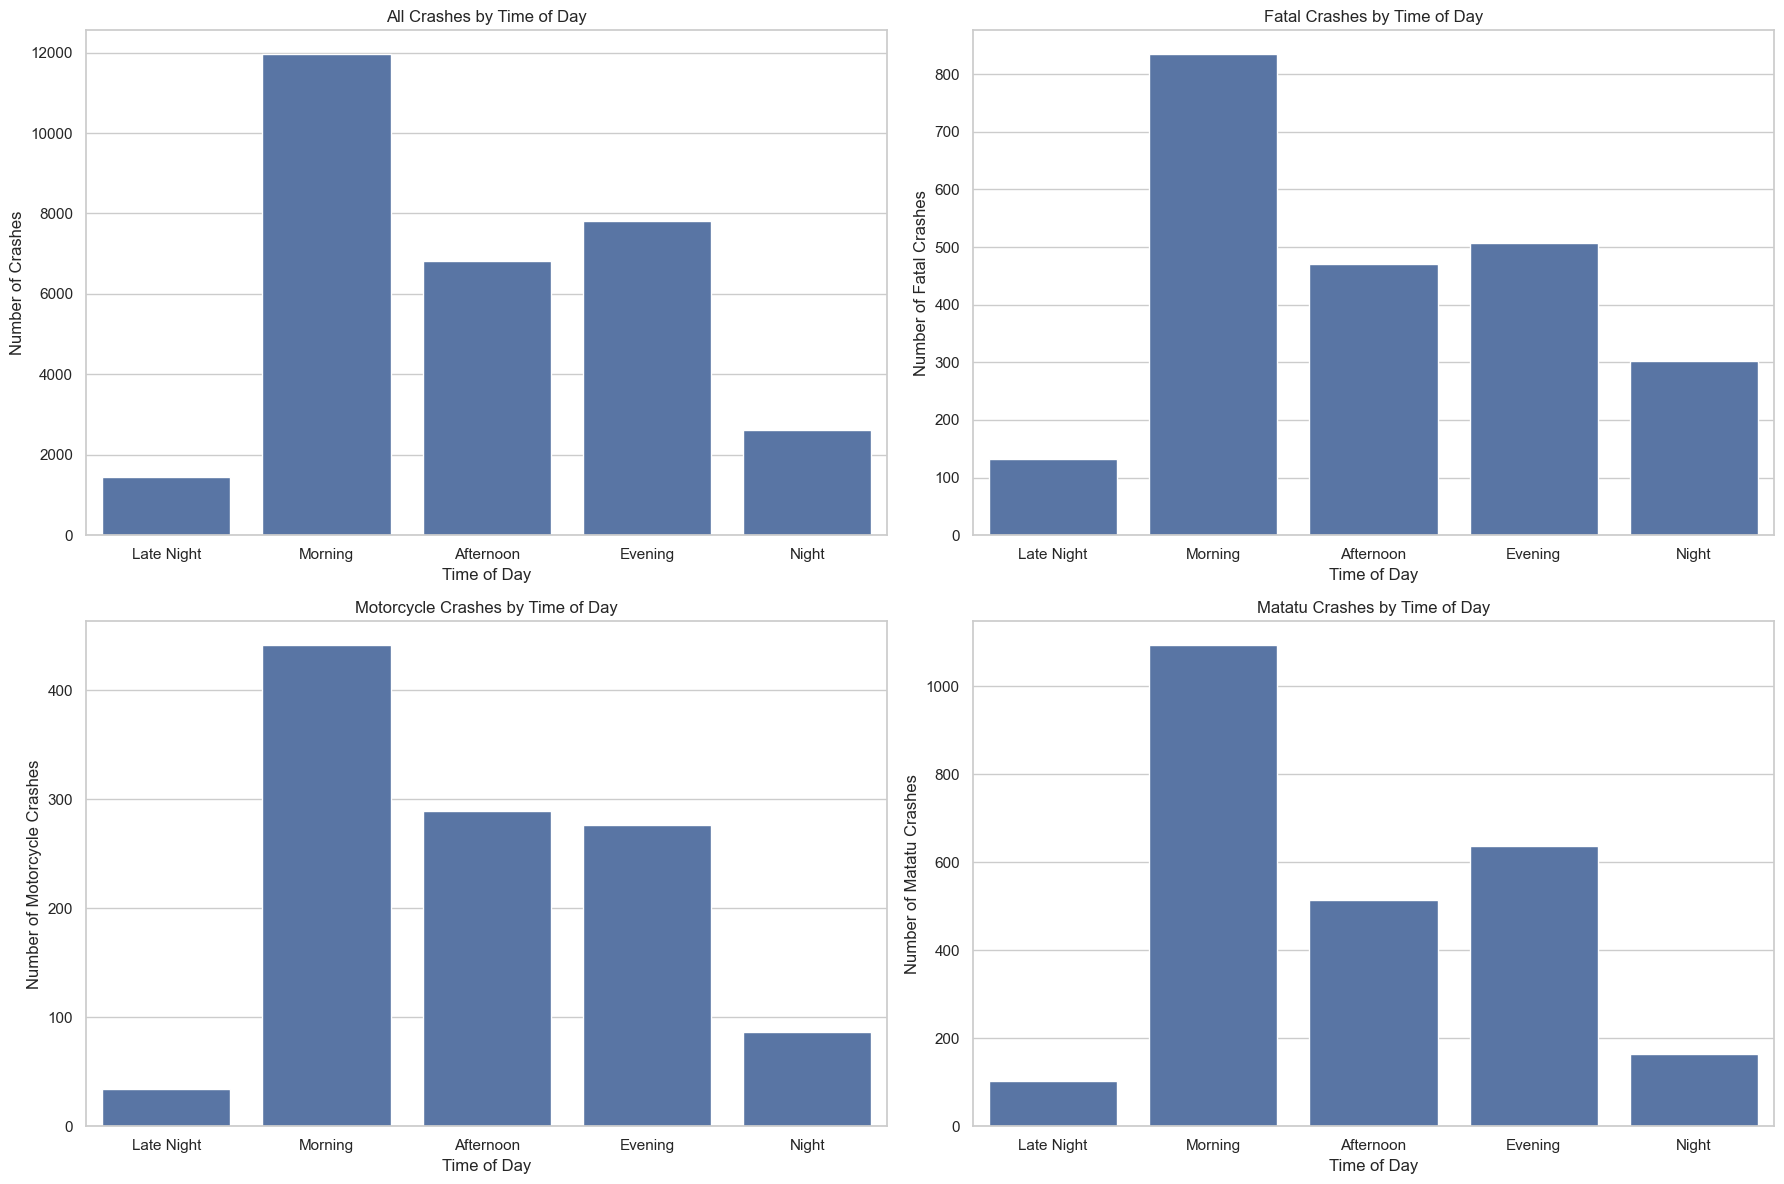

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create sub-dataframes
fatal_df = df[df['contains_fatality_words'] == 1]
motorcycle_df = df[df['contains_motorcycle_words'] == 1]
matatu_df = df[df['contains_matatu_words'] == 1]

# Set seaborn style
sns.set(style="whitegrid")

# Define time of day order
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# All Crashes
sns.countplot(data=df, x='time_of_day', order=time_order, ax=axs[0, 0])
axs[0, 0].set_title('All Crashes by Time of Day')
axs[0, 0].set_xlabel('Time of Day')
axs[0, 0].set_ylabel('Number of Crashes')

# Fatal Crashes
sns.countplot(data=fatal_df, x='time_of_day', order=time_order, ax=axs[0, 1])
axs[0, 1].set_title('Fatal Crashes by Time of Day')
axs[0, 1].set_xlabel('Time of Day')
axs[0, 1].set_ylabel('Number of Fatal Crashes')

# Motorcycle Crashes
sns.countplot(data=motorcycle_df, x='time_of_day', order=time_order, ax=axs[1, 0])
axs[1, 0].set_title('Motorcycle Crashes by Time of Day')
axs[1, 0].set_xlabel('Time of Day')
axs[1, 0].set_ylabel('Number of Motorcycle Crashes')

# Matatu Crashes
sns.countplot(data=matatu_df, x='time_of_day', order=time_order, ax=axs[1, 1])
axs[1, 1].set_title('Matatu Crashes by Time of Day')
axs[1, 1].set_xlabel('Time of Day')
axs[1, 1].set_ylabel('Number of Matatu Crashes')

# Adjust layout and display
plt.tight_layout()
plt.show()
destination =  r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\all_crashes_by_timeofday.png'
save_figures(fig, destination)


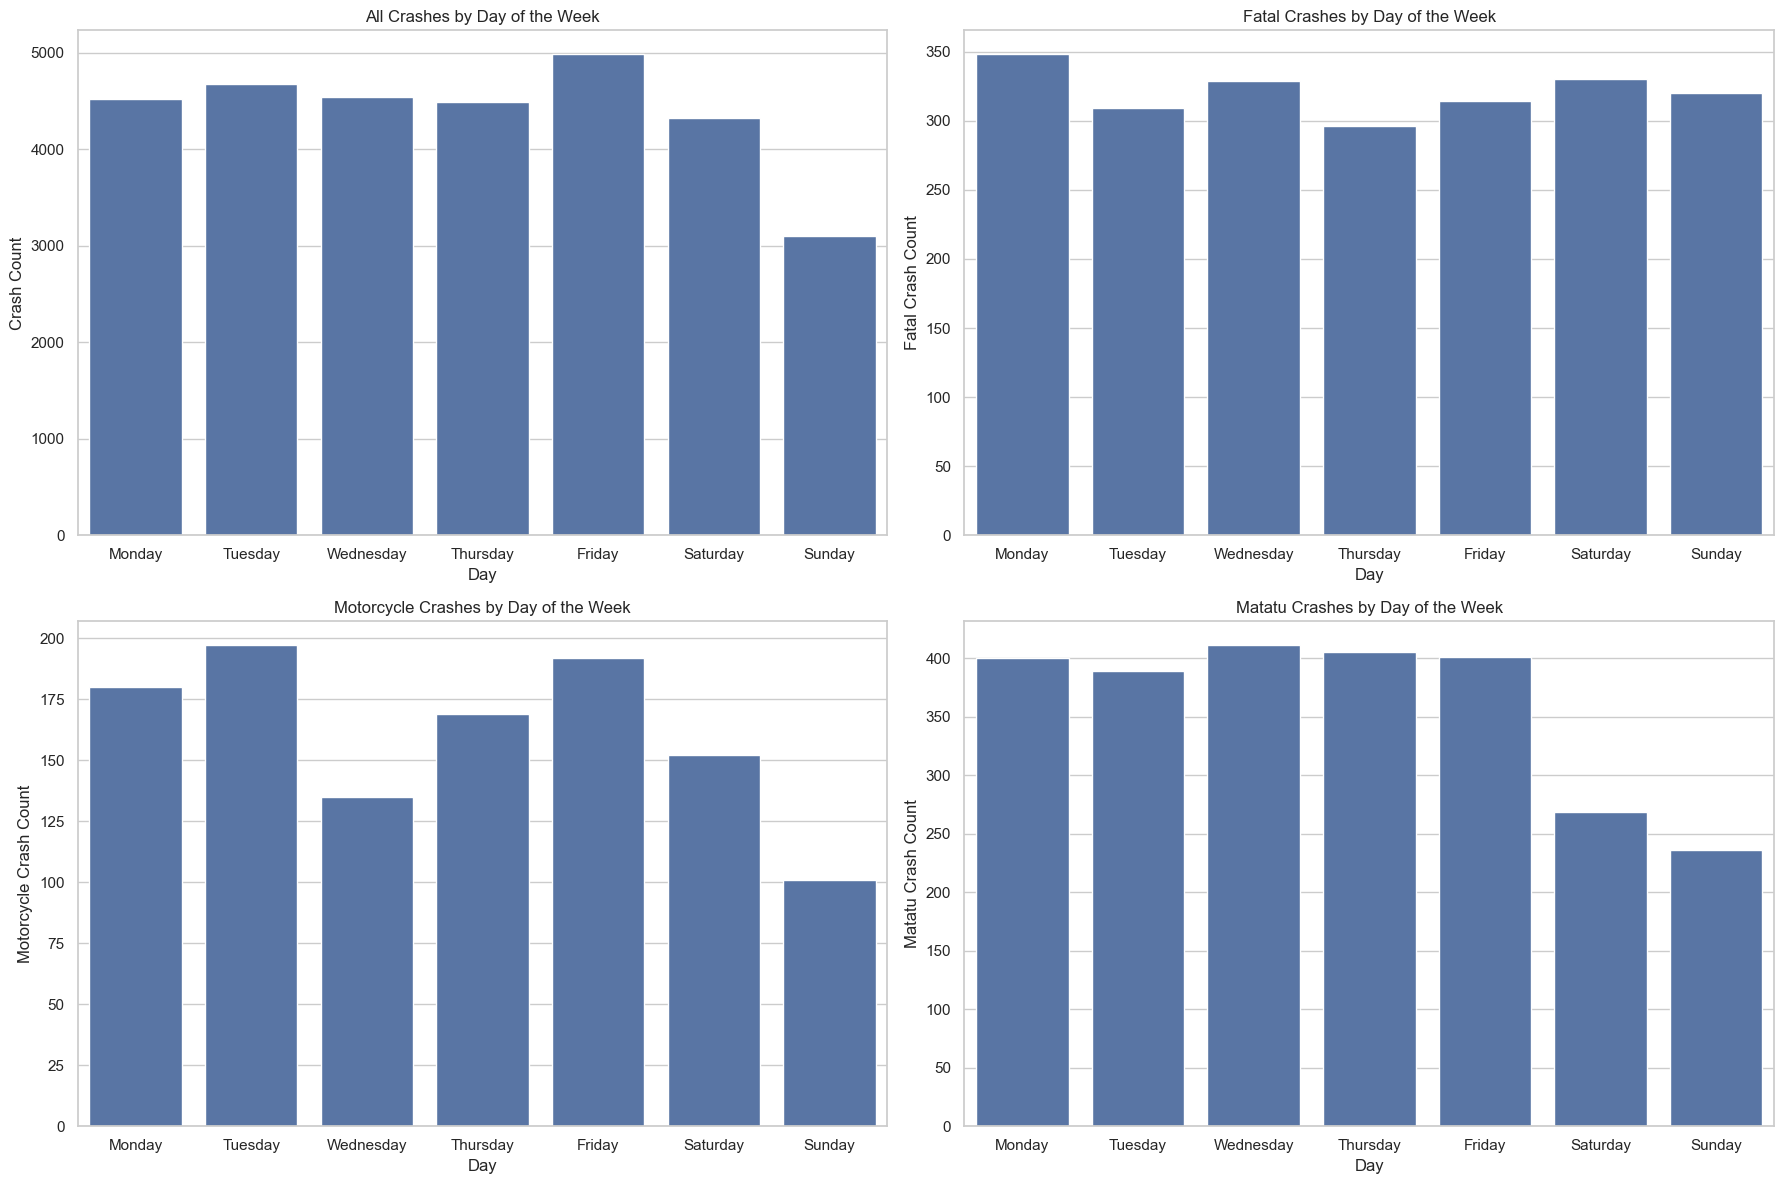

In [42]:
import pandas as pd

# If not already done, make sure day is an integer
df['day'] = df['day'].astype(int)

# Create a datetime column from year, month, day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Extract weekday name from the datetime column
df['weekday'] = df['date'].dt.day_name()

# Optional: Define the order for correct weekday sorting in plots
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filter datasets
fatal_df = df[df['contains_fatality_words'] == 1]
motorcycle_df = df[df['contains_motorcycle_words'] == 1]
matatu_df = df[df['contains_matatu_words'] == 1]

# Set seaborn style
sns.set(style="whitegrid")

# Plot
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# All Crashes
sns.countplot(data=df, x='weekday', order=weekday_order, ax=axs[0, 0])
axs[0, 0].set_title('All Crashes by Day of the Week')
axs[0, 0].set_xlabel('Day')
axs[0, 0].set_ylabel('Crash Count')

# Fatal Crashes
sns.countplot(data=fatal_df, x='weekday', order=weekday_order, ax=axs[0, 1])
axs[0, 1].set_title('Fatal Crashes by Day of the Week')
axs[0, 1].set_xlabel('Day')
axs[0, 1].set_ylabel('Fatal Crash Count')

# Motorcycle Crashes
sns.countplot(data=motorcycle_df, x='weekday', order=weekday_order, ax=axs[1, 0])
axs[1, 0].set_title('Motorcycle Crashes by Day of the Week')
axs[1, 0].set_xlabel('Day')
axs[1, 0].set_ylabel('Motorcycle Crash Count')

# Matatu Crashes
sns.countplot(data=matatu_df, x='weekday', order=weekday_order, ax=axs[1, 1])
axs[1, 1].set_title('Matatu Crashes by Day of the Week')
axs[1, 1].set_xlabel('Day')
axs[1, 1].set_ylabel('Matatu Crash Count')

# Final layout adjustments
plt.tight_layout()
plt.show()

destination =r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\all_crashes by day.png'
save_figures(fig, destination)


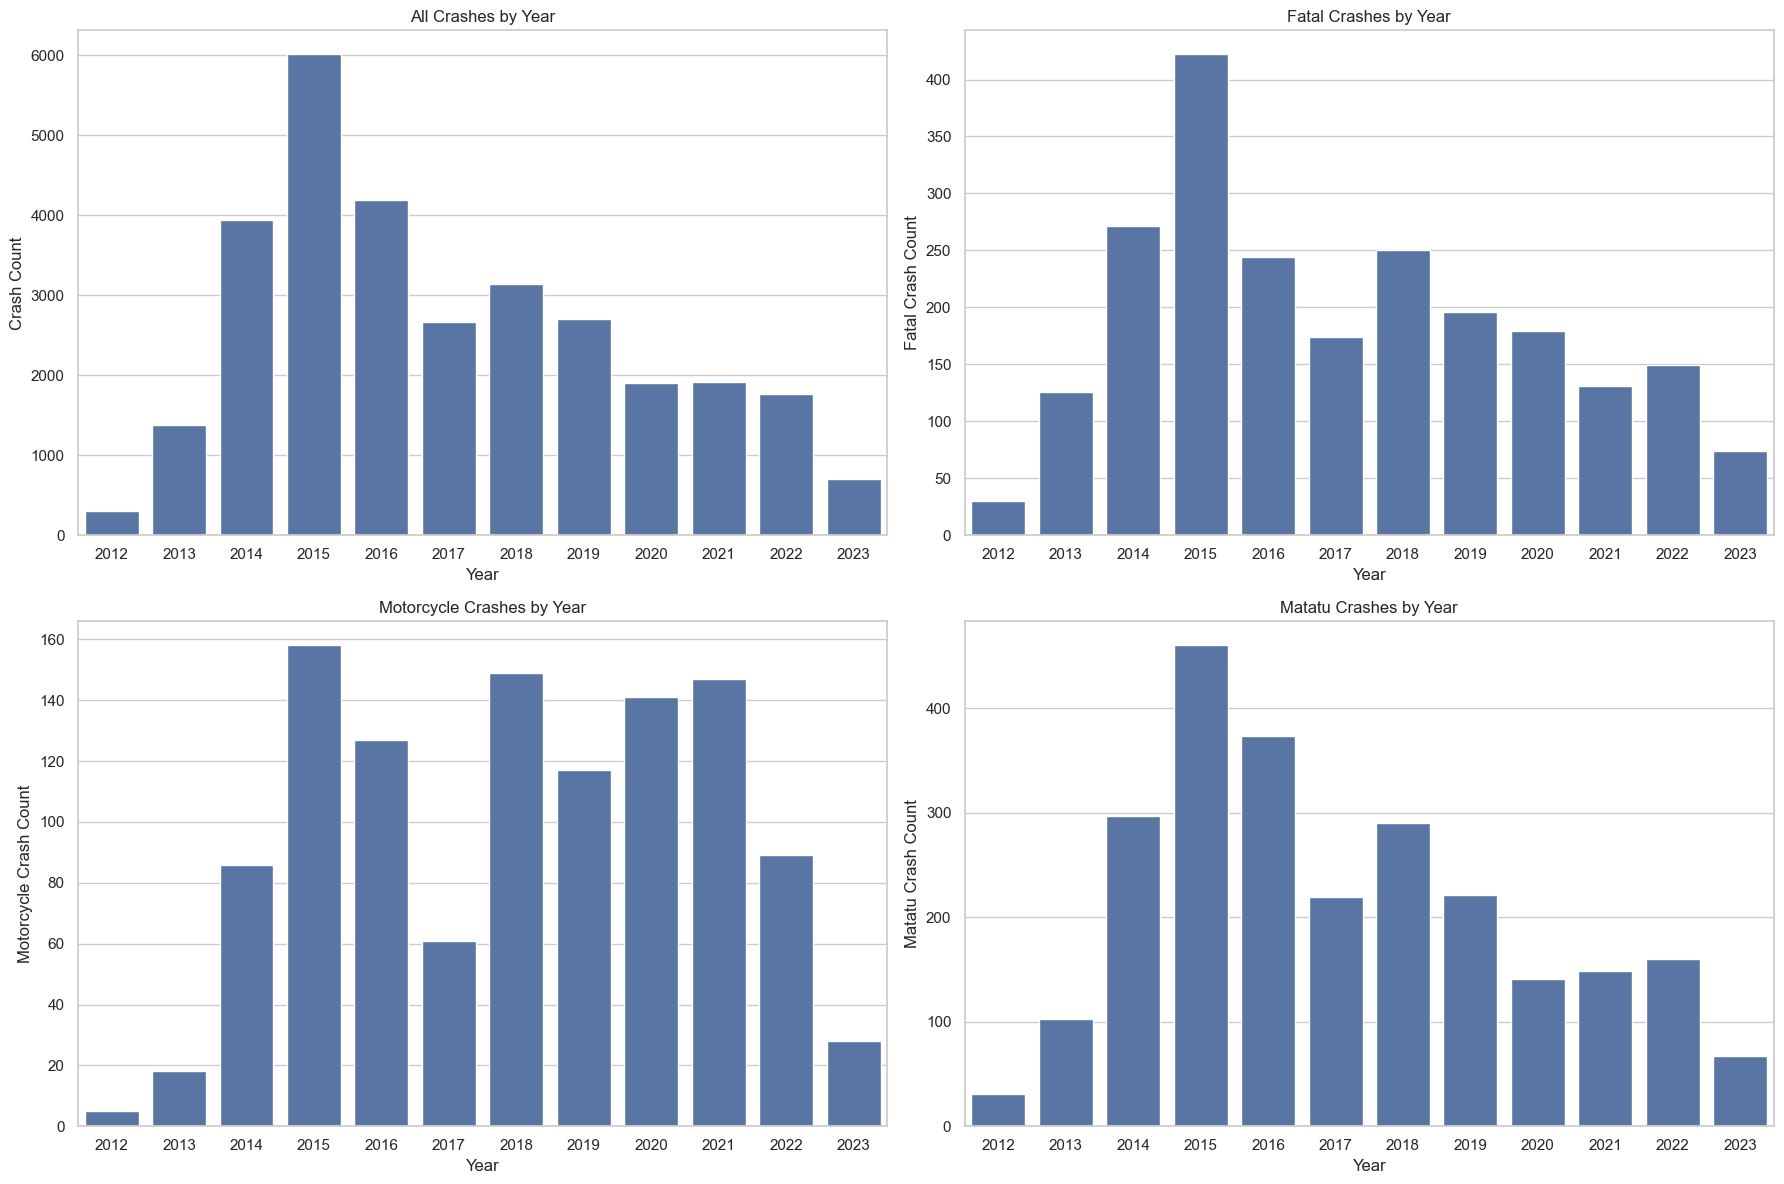

In [ ]:
# Prepare sub-dataframes
fatal_df = df[df['contains_fatality_words'] == 1]
motorcycle_df = df[df['contains_motorcycle_words'] == 1]
matatu_df = df[df['contains_matatu_words'] == 1]

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# 1. All crashes by year
sns.countplot(data=df, x='year', ax=axs[0, 0])
axs[0, 0].set_title('All Crashes by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Crash Count')

# 2. Fatal crashes by year
sns.countplot(data=fatal_df, x='year', ax=axs[0, 1])
axs[0, 1].set_title('Fatal Crashes by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Fatal Crash Count')

# 3. Motorcycle crashes by year
sns.countplot(data=motorcycle_df, x='year', ax=axs[1, 0])
axs[1, 0].set_title('Motorcycle Crashes by Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Motorcycle Crash Count')

# 4. Matatu crashes by year
sns.countplot(data=matatu_df, x='year', ax=axs[1, 1])
axs[1, 1].set_title('Matatu Crashes by Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Matatu Crash Count')

# Final layout adjustments
plt.tight_layout()
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\all_crashes_by_year.png'
save_figures(fig, destination)

In [88]:
X =df.drop(columns=['county_name', 'County_Code_x', 'time', 'date', 'weekday', 'County_Code_y'])
X.sample(3)

,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,month,year,day,hour,time_of_day,cluster,pca_1,pca_2
16819,1,0,0,0,0,8,2015,16,16,Afternoon,1,0.398065,0.813237
13451,1,0,0,0,0,12,2014,11,18,Evening,1,2.210375,-2.375273
24616,1,0,0,0,0,4,2018,22,14,Afternoon,1,0.221309,0.743099


In [89]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['time_of_day'] = encoder.fit_transform(X['time_of_day'])
X.sample(2)

,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,month,year,day,hour,time_of_day,cluster,pca_1,pca_2
12740,1,0,0,0,0,10,2014,21,17,1,1,1.467233,1.069153
12655,1,0,0,1,0,10,2014,14,18,1,1,2.000739,-2.071184


In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['County_Code_y', 'time_of_day', 'month'], drop_first=True)

# Select features for clustering
features = df_encoded[[
    'n_crash_reports',
    'contains_fatality_words',
    'contains_pedestrian_words',
    'contains_matatu_words',
    'contains_motorcycle_words',
    'hour'
] + [col for col in df_encoded.columns if col.startswith('County_Code_y_') or col.startswith('time_of_day_') or col.startswith('month_')]]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [91]:
X_scaled

array([[-0.26953208, -0.28122463, -0.17779138, ..., -0.30126978,
        -0.3088107 , -0.30351939],
       [-0.26953208, -0.28122463, -0.17779138, ..., -0.30126978,
        -0.3088107 , -0.30351939],
       [-0.26953208, -0.28122463, -0.17779138, ..., -0.30126978,
        -0.3088107 , -0.30351939],
       ...,
       [ 1.74374643, -0.28122463, -0.17779138, ..., -0.30126978,
        -0.3088107 , -0.30351939],
       [ 1.07265359, -0.28122463, -0.17779138, ..., -0.30126978,
        -0.3088107 , -0.30351939],
       [ 0.40156075, -0.28122463, -0.17779138, ..., -0.30126978,
        -0.3088107 , -0.30351939]], shape=(30645, 32))

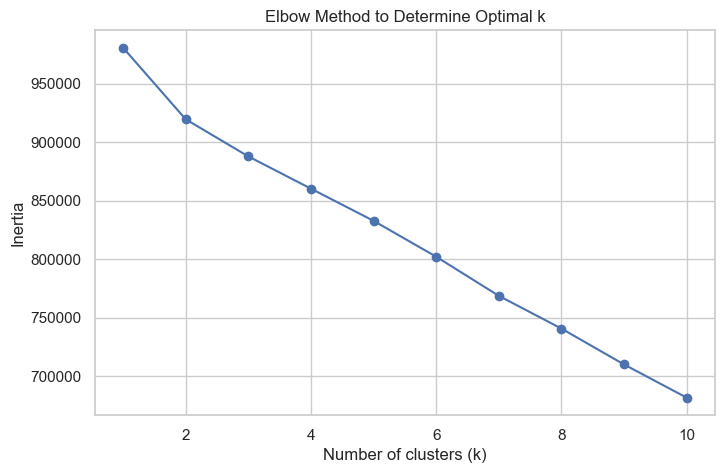

In [115]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\optimal_clusters.png'
save_figures(fig, destination)

In [93]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


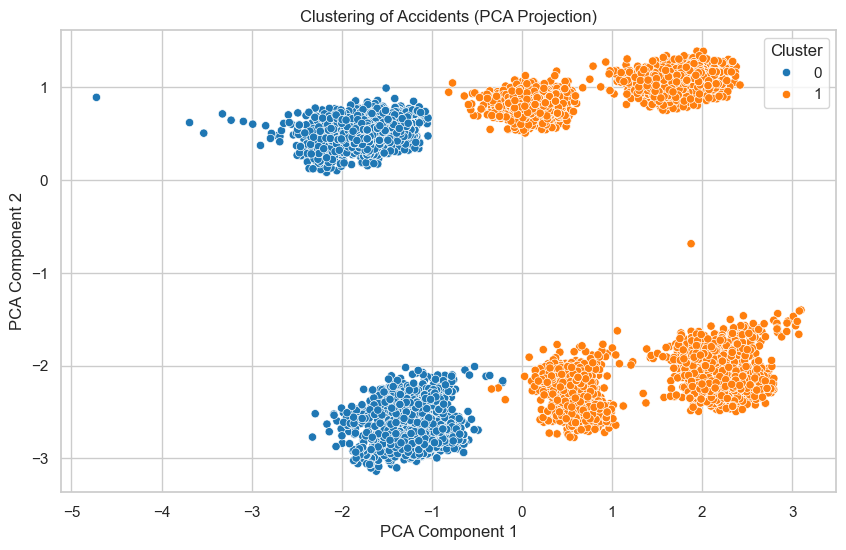

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='tab10')
plt.title('Clustering of Accidents (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\clusters2012_2024.png'
save_figures(fig, destination)


In [95]:
# Group by cluster and get means
cluster_summary = df.groupby('cluster')[[
    'n_crash_reports',
    'contains_fatality_words',
    'contains_pedestrian_words',
    'contains_matatu_words',
    'contains_motorcycle_words',
    'hour',
    'year'
]].mean().round(2)

# Display the summary
print(cluster_summary)


         n_crash_reports  contains_fatality_words  contains_pedestrian_words  \
cluster                                                                        
0                   1.49                     0.07                       0.03   
1                   1.33                     0.07                       0.03   

         contains_matatu_words  contains_motorcycle_words   hour     year  
cluster                                                                    
0                         0.09                       0.04   7.45  2017.11  
1                         0.08                       0.04  17.19  2016.91  


🔹 Cluster 0

Average crash reports: 1.49 (highest)

Fatality-related words: ~7.0%

Pedestrian mentions: ~3.0% (highest)

Matatu mentions: 9.0%

Motorcycle mentions: 4.0%

Hour: 7.45 (early morning)

Year: Avg ~2017.1

Interpretation:
Cluster 0 represents crash reports occurring mostly in the early morning hours, with the highest average number of crash reports per case. There’s slightly higher pedestrian involvement and a moderate presence of matatus and motorcycles. While fatalities are not the highest, the elevated pedestrian presence could indicate commuter-related incidents, possibly during school or work rush hours.

🔹 Cluster 1

Average crash reports: 1.33

Fatality mentions: ~7.0%

Pedestrian mentions: ~3.0%

Matatu mentions: 8.0%

Motorcycle mentions: 4.0%

Hour: 17.19 (late afternoon / early evening)

Year: Avg ~2016.9

Interpretation:
Cluster 1 captures crashes in the evening period, with slightly fewer crash reports on average. Fatality and pedestrian mentions are comparable to Cluster 0, but it occurs later in the day. This may reflect post-work traffic or school pickup traffic patterns. Matatu and motorcycle involvement remain moderate.

In [96]:
X_filtered = X[(X['year'] >= 2022) & (X['year'] <= 2024)]
X_filtered.shape

(2477, 13)

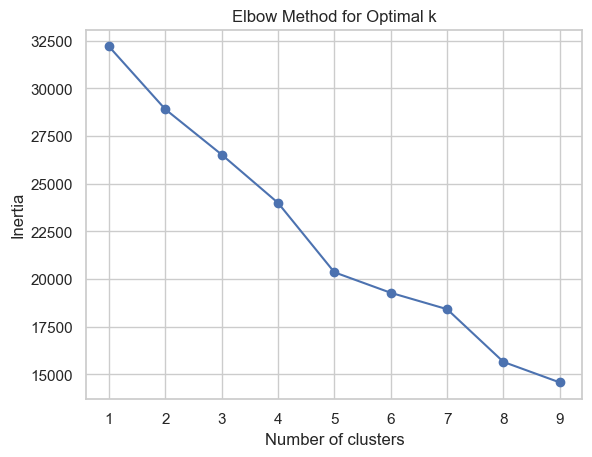

In [117]:
X_scaled_filtered = scaler.fit_transform(X_filtered)
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_filtered)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\optimal_ks_2022_2024.png'
save_figures(fig, destination)


In [114]:
clusters = X_filtered.groupby('cluster').mean()
clusters


,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,month,year,day,hour,time_of_day,pca_1,pca_2
cluster,,,,,,,,,,,,
0,1.331584,0.079748,0.010493,0.084995,0.050367,5.818468,2022.176285,15.417629,15.746065,0.371459,0.843864,-0.100332
1,1.366364,0.086364,0.020909,0.089091,0.050000,5.664545,2022.267273,15.900909,7.391818,2.865455,-1.527524,-0.432714
2,1.193396,0.122642,0.082547,0.113208,0.033019,4.884434,2022.580189,15.186321,20.334906,2.691038,1.976240,0.177306


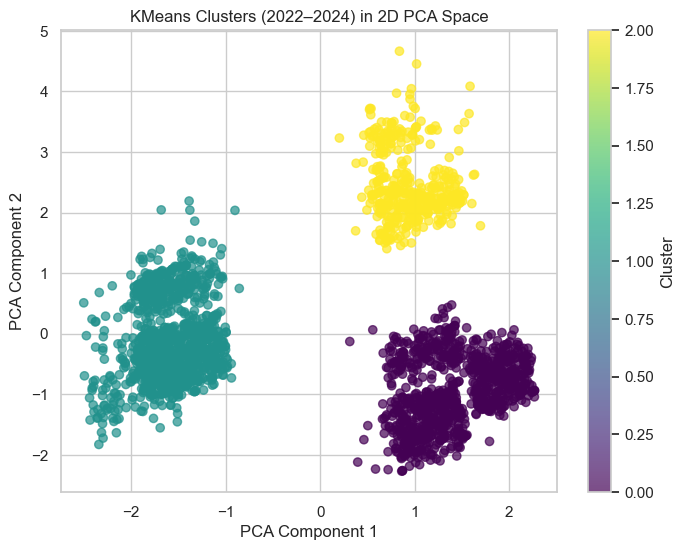

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_filtered, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (2022–2024) in 2D PCA Space')
plt.colorbar(label='Cluster')
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\clusters2022_2024.png'
save_figures(fig, destination)

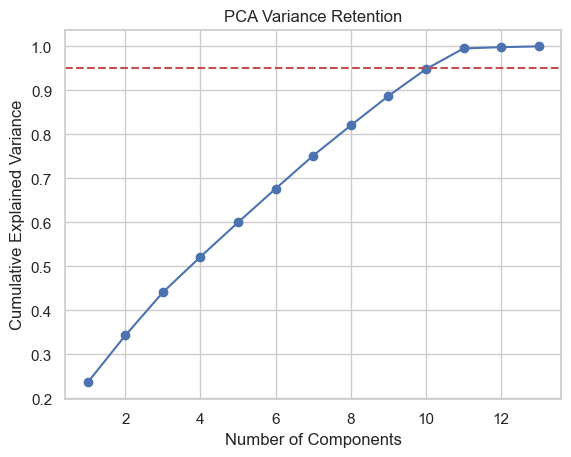

In [108]:
pca_full = PCA().fit(X_scaled_filtered)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Retention')
plt.grid(True)
plt.show()


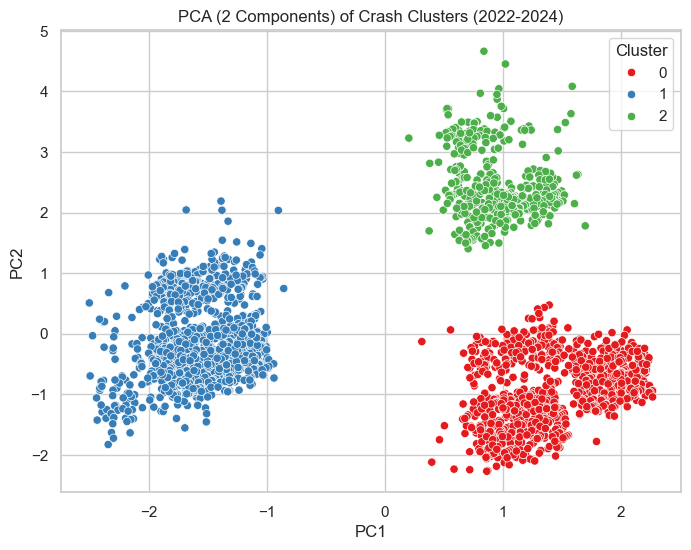

In [119]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_filtered, palette='Set1')
plt.title('PCA (2 Components) of Crash Clusters (2022-2024)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\2dclusters_2022_2024.png'
save_figures(fig, destination)

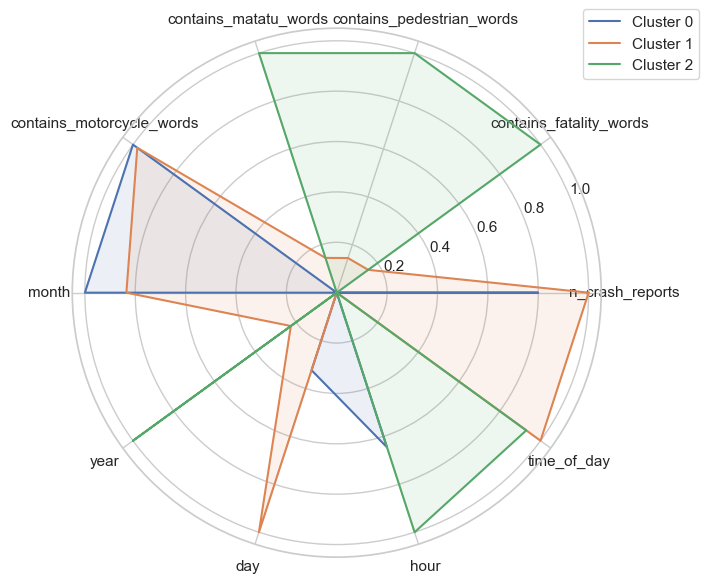

In [121]:
clusters = X_filtered.groupby('cluster').mean()


df_clusters = pd.DataFrame(clusters)

df_clusters = df_clusters.drop(columns =['pca_1',  'pca_2'])
# Normalize the data for radar chart
df_normalized = df_clusters.copy()
df_normalized = (df_normalized - df_normalized.min()) / (df_normalized.max() - df_normalized.min())

# Radar chart setup
labels = df_normalized.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plot each cluster
for idx, row in df_normalized.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Cluster {idx}")
    ax.fill(angles, values, alpha=0.1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.05))
plt.tight_layout()
plt.show()
destination = r'C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\reports\figures\crashes_radar_chart.png'
save_figures(fig, destination)

In [124]:
import joblib
import os

# Define your file path
model_path = r"C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\models\kmeans_model.pkl"

# Save the model
joblib.dump(kmeans, model_path)


scaler_path = r"C:\Users\nexwa\OneDrive\Desktop\DATA SCIENCE PROJECTS\PYTHON PROJECTS\Data Science environment\data_pipeline\accidents prediction\models\scaler.pkl"
joblib.dump(scaler, scaler_path)


['C:\\Users\\nexwa\\OneDrive\\Desktop\\DATA SCIENCE PROJECTS\\PYTHON PROJECTS\\Data Science environment\\data_pipeline\\accidents prediction\\models\\scaler.pkl']

# Cluster segments

Cluster 0 (Blue)
This cluster represents motorcycle-related crashes. Key features include:

High concentration of motorcycle-related keywords in crash reports
Moderate temporal spread across different months
Lower fatality rates compared to other clusters
Appears to be the most temporally distributed cluster
Generally occurs throughout various times of day

Cluster 1 (Red)
This cluster appears to focus on temporal and crash volume patterns. Notable characteristics:

Highest number of crash reports (n_crash_reports)
Strong association with specific time periods (time_of_day, hour)
Moderate presence of fatality-related language
Shows clustering around certain temporal windows
May represent high-traffic periods or accident-prone times

Cluster 2 (Green)
This cluster is characterized by high-severity incidents, particularly:

Highest levels of fatality-related words in reports
Strong presence of pedestrian-related incidents
Some association with matatu (public transport) crashes
Lower overall crash frequency but higher severity
May represent more serious accident types involving vulnerable road users


# Crash Clustering Analysis – Findings & Recommendations

Cluster 0 (Blue) – Motorcycle-Related Incidents (Low Risk)
Key Features:

High frequency of motorcycle-related keywords in crash reports.

Low fatality rate compared to other clusters.

Moderately distributed across different months and times of day.

Lower overall severity but consistently occurring.

Interpretation:
Motorcycle crashes are frequent but typically less severe, possibly involving lower-speed collisions or minor injuries. The crashes are distributed across various periods, implying no sharp peaks in timing or seasonality.

Risk Level: 🟦 Low Risk

Recommendations:

Introduce awareness campaigns and training for motorcycle riders focused on safety.

Encourage use of helmets and reflective gear, especially during dusk/dawn hours.

Monitor high-frequency areas with minor motorcycle incidents to prevent escalation into more severe accidents.


Cluster 1 (Red) – Temporal & Volume-Driven Crashes (Mixed Risk)
Key Features:

Highest number of crash reports.

Strong temporal concentration (specific hours of the day).

Moderate levels of fatality-related language.

Likely aligned with rush hours or commute patterns.

Interpretation:
These are frequent, mostly routine crashes that happen during busy periods (mornings/evenings). While not the most severe, their sheer volume makes them a public safety concern. These incidents likely contribute to congestion, property damage, and minor injuries.

Risk Level: 🟧 Mixed Risk

Recommendations:

Implement intelligent traffic management systems to ease congestion during peak hours.

Improve road signage, lane markings, and lighting in accident-prone corridors.

Explore the introduction of dedicated lanes for high-volume traffic zones (e.g., matatus, motorcycles).


Cluster 2 (Green) – High-Severity, Pedestrian-Heavy Crashes (High Risk)
Key Features:

Highest levels of fatality-related keywords.

Strong presence of pedestrian and matatu mentions.

Occurs more during evening or night.

Lower overall frequency but very high severity.

Interpretation:
This cluster represents crashes that are less frequent but far more dangerous, involving vulnerable road users such as pedestrians and public transport passengers. These may occur in poorly lit areas, informal crossing zones, or near public transit stops.

Risk Level: 🟩 High Risk

Recommendations:

Prioritize urban safety infrastructure, including zebra crossings, traffic calming measures, and pedestrian bridges.

Implement nighttime patrols and lighting projects in high-risk zones.

Regulate matatu operations, ensuring safe stopping zones and proper route enforcement.

# RECOMMENDATIONS

Distinct Crash Types: PCA and radar visualizations highlight meaningful segmentation—by vehicle type (motorcycles), time-based patterns, and severity (fatalities/pedestrians).

High-Risk Group Identified: Cluster 2 poses the greatest public health risk due to its severity and vulnerability factors.

Temporal Patterns Matter: Cluster 1 shows that time-of-day management (rush hour interventions) could reduce frequent but moderate crashes.

Motorcycle Cluster Is Contained: Cluster 0, though frequent, offers a manageable risk level with targeted rider behavior change programs.



1. Targeted Interventions per Cluster – Use cluster labels to guide localized interventions (e.g., road upgrades in high-severity areas vs. commuter regulation in high-volume zones).

2. Data-Driven Policy – Integrate clustering into municipal transport planning to support risk-based budgeting for safety infrastructure.

3. Public Awareness Campaigns – Tailor safety campaigns by audience: motorcycle riders, pedestrians, matatu operators, and general commuters.

4. Continuous Monitoring – Re-run clustering quarterly to detect emerging trends or seasonal shifts in crash patterns.

5. Incorporate community reporting tools via mobile apps or SMS to validate emerging hotspots.

6. Improve traffic signal timing, roundabout design, and police presence during commute hours.

7. Encourage fleet tracking systems and stricter inspection of matatus.

8. Enforce speed limits and conduct random breathalyzer checks during late evening hours.

9. Implement enhanced street lighting, reflective road signs, and pedestrian barriers in high-risk areas.



